# Explore here

In [49]:
pip install -r/workspaces/machine-learning-python-reyna/requirements.txt

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [50]:
import pandas as pd
import requests
from io import StringIO

# Descargar datos desde la URL
url = "https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv"
response = requests.get(url)
data = response.text

# Eliminar comillas dobles
data_no_quotes = data.replace('"', '')

# Leer datos en un DataFrame de pandas
total_data = pd.read_csv(StringIO(data_no_quotes), sep=';')

# Imprimir el DataFrame
print(total_data.head())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

In [27]:
# code here
###Este codigo probe primero, pero no eliminaba totalmente las """"

#total_data = pd.read_csv ("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv") 
#total_data.to_csv("../data/raw/total_data.csv", index = False)
#file_path = "/workspaces/machine-learning-python-reyna/data/raw/total_data.csv"
#total_data = pd.read_csv(file_path, sep=";")
#total_data_no_quotes = total_data.replace('"', '')
#total_data.columns = total_data.columns.str.strip('"')
#total_data.head()



age. Edad del cliente (numérico)
job. Tipo de trabajo (categórico)
marital. Estado civil (categórico)
education. Nivel de educación (categórico)
default. ¿Tiene crédito actualmente? (categórico)
housing. ¿Tiene un préstamo de vivienda? (categórico)
loan. ¿Tiene un préstamo personal? (categórico)
contact. Tipo de comunicación de contacto (categórico)
month. Último mes en el que se le ha contactado (categórico)
day_of_week. Último día en el que se le ha contactado (categórico)
duration. Duración del contacto previo en segundos (numérico)
campaign. Número de contactos realizados durante esta campaña al cliente (numérico)
pdays. Número de días que transcurrieron desde la última campaña hasta que fue contactado (numérico)
previous. Número de contactos realizados durante la campaña anterior al cliente (numérico)
poutcome. Resultado de la campaña de marketing anterior (categórico)
emp.var.rate. Tasa de variación del empleo. Indicador trimestral (numérico)
cons.price.idx. Índice de precios al consumidor. Indicador mensual (numérico)
cons.conf.idx. Índice de confianza del consumidor. Indicador mensual (numérico)
euribor3m. Tasa EURIBOR 3 meses. Indicador diario (numérico)
nr.employed. Número de empleados. Indicador trimestral (numérico)
y. TARGET. El cliente contrata un depósito a largo plazo o no.

In [52]:
#### dimensiones del dataframe
total_data.shape
##### datos null y tipo de datos que hay en mi dataframe
total_data.info ()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [53]:
##### Para ver falta de data
total_data.isnull().sum ()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [54]:
###duplicados
total_data = total_data.drop_duplicates().reset_index(drop = True)
total_data.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [56]:
######Eliminar información irrelevante
total_data.drop(["month", "day_of_week"], axis = 1, inplace = True)
total_data.head()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


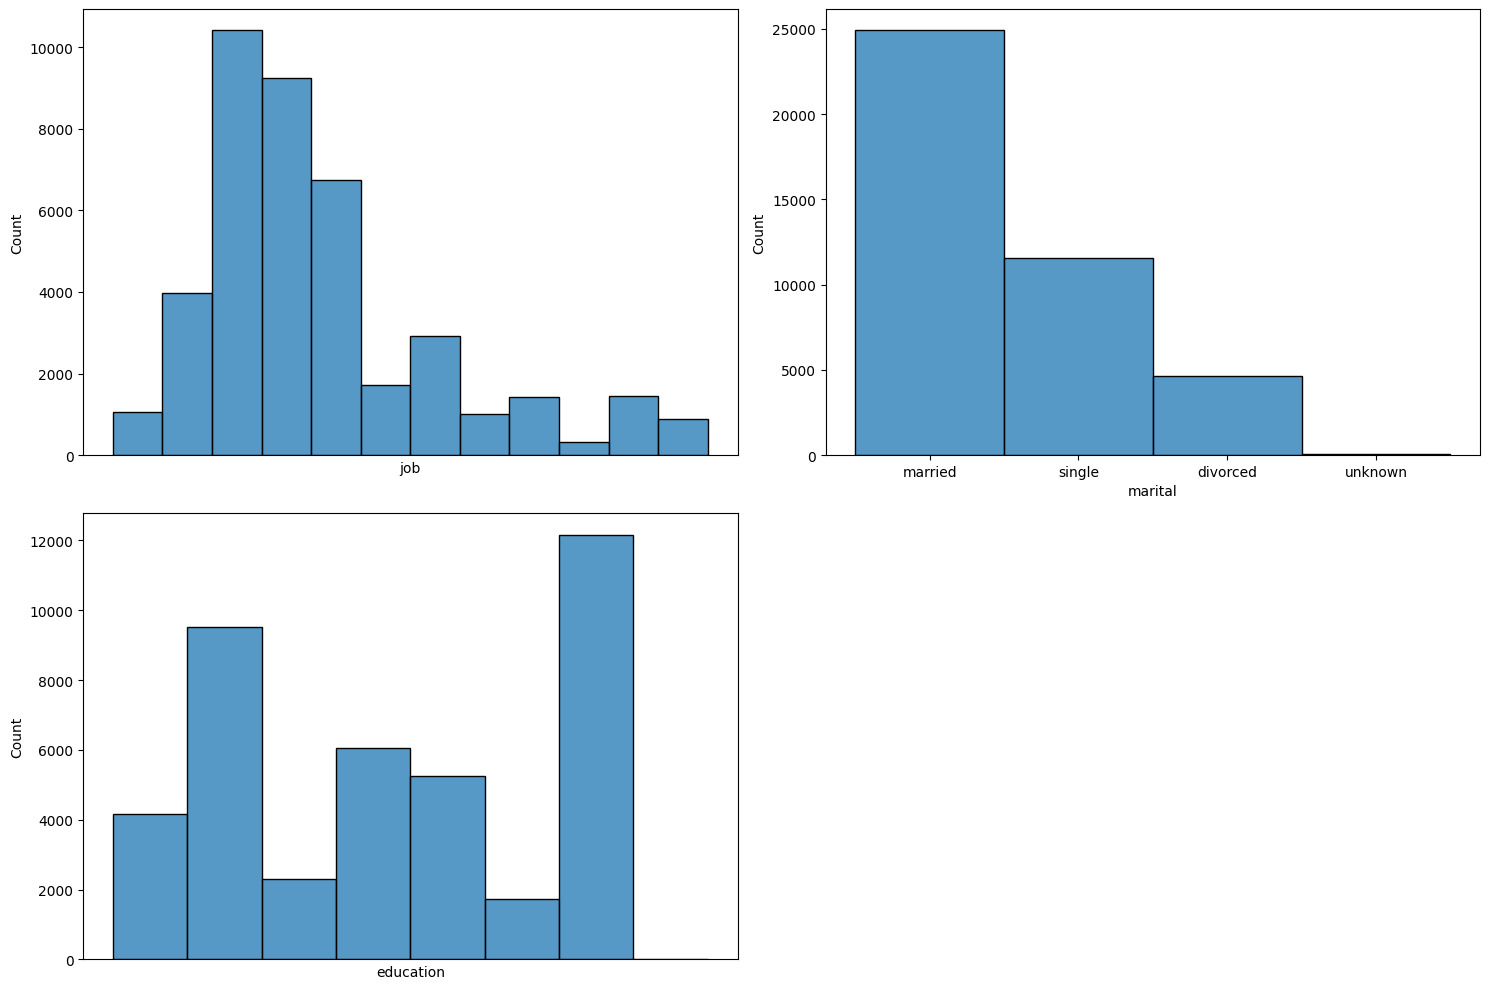

In [32]:
import matplotlib.pyplot as plt 
import seaborn as sns


fig, axis = plt.subplots(2, 2, figsize = (15, 10))

# Crear un histograma múltiple

sns.histplot(ax = axis[0, 0], data = total_data, x = "job").set_xticks([])
sns.histplot(ax = axis[0, 1], data = total_data, x = "marital")
sns.histplot(ax = axis[1, 0], data = total_data, x = "education").set_xticks([])
fig.delaxes(axis[1, 1])


# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

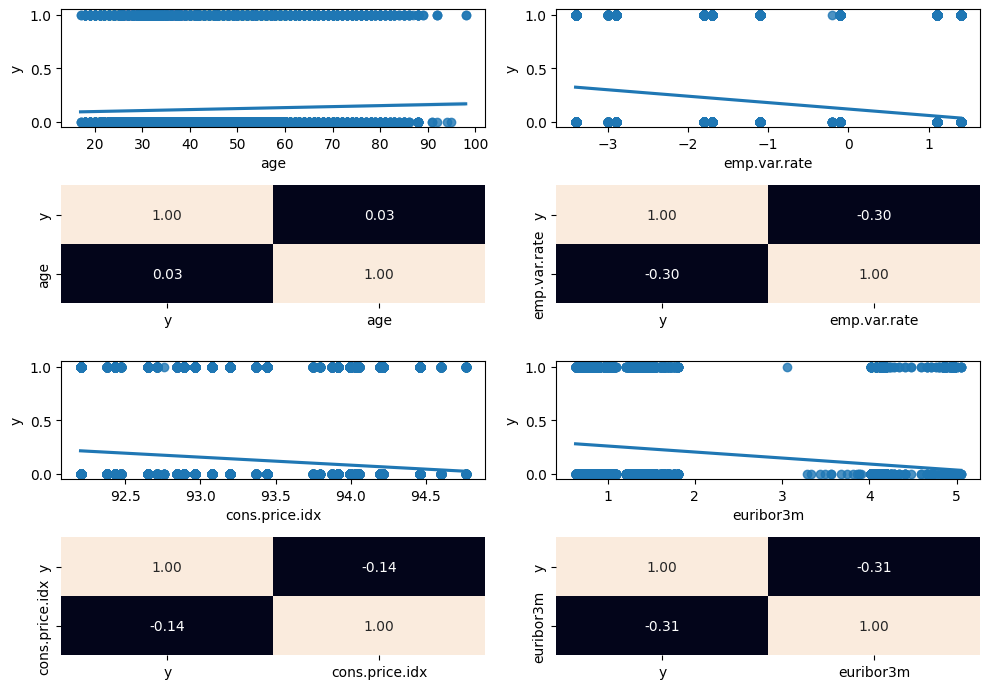

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

fig, axis = plt.subplots(4, 2, figsize=(10, 7))

# Create a multiple scatter plot
sns.regplot(ax=axis[0, 0], data=total_data, x="age", y="y")
sns.heatmap(total_data[["y", "age"]].corr(), annot=True, fmt=".2f", ax=axis[1, 0], cbar=False)

sns.regplot(ax=axis[0, 1], data=total_data, x="emp.var.rate", y="y")
sns.heatmap(total_data[["y", "emp.var.rate"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1], cbar=False)  # Fix here

sns.regplot(ax=axis[2, 0], data=total_data, x="cons.price.idx", y="y")
sns.heatmap(total_data[["y", "cons.price.idx"]].corr(), annot=True, fmt=".2f", ax=axis[3, 0], cbar=False)  # Fix here


sns.regplot(ax=axis[2, 1], data=total_data, x="euribor3m", y="y")
sns.heatmap(total_data[["y", "euribor3m"]].corr(), annot=True, fmt=".2f", ax=axis[3, 1], cbar=False) 



# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [60]:
###Factorizar la variable
total_data["job"] = pd.factorize(total_data["job"])[0]
total_data["marital"] = pd.factorize(total_data["marital"])[0]
total_data["education"] = pd.factorize(total_data["education"])[0]
total_data["default"] = pd.factorize(total_data["default"])[0]
total_data["housing"] = pd.factorize(total_data["housing"])[0]
total_data["loan"] = pd.factorize(total_data["loan"])[0]
total_data["contact"] = pd.factorize(total_data["contact"])[0]
total_data["poutcome"] = pd.factorize(total_data["poutcome"])[0]
total_data["y"] = pd.factorize(total_data["y"])[0]

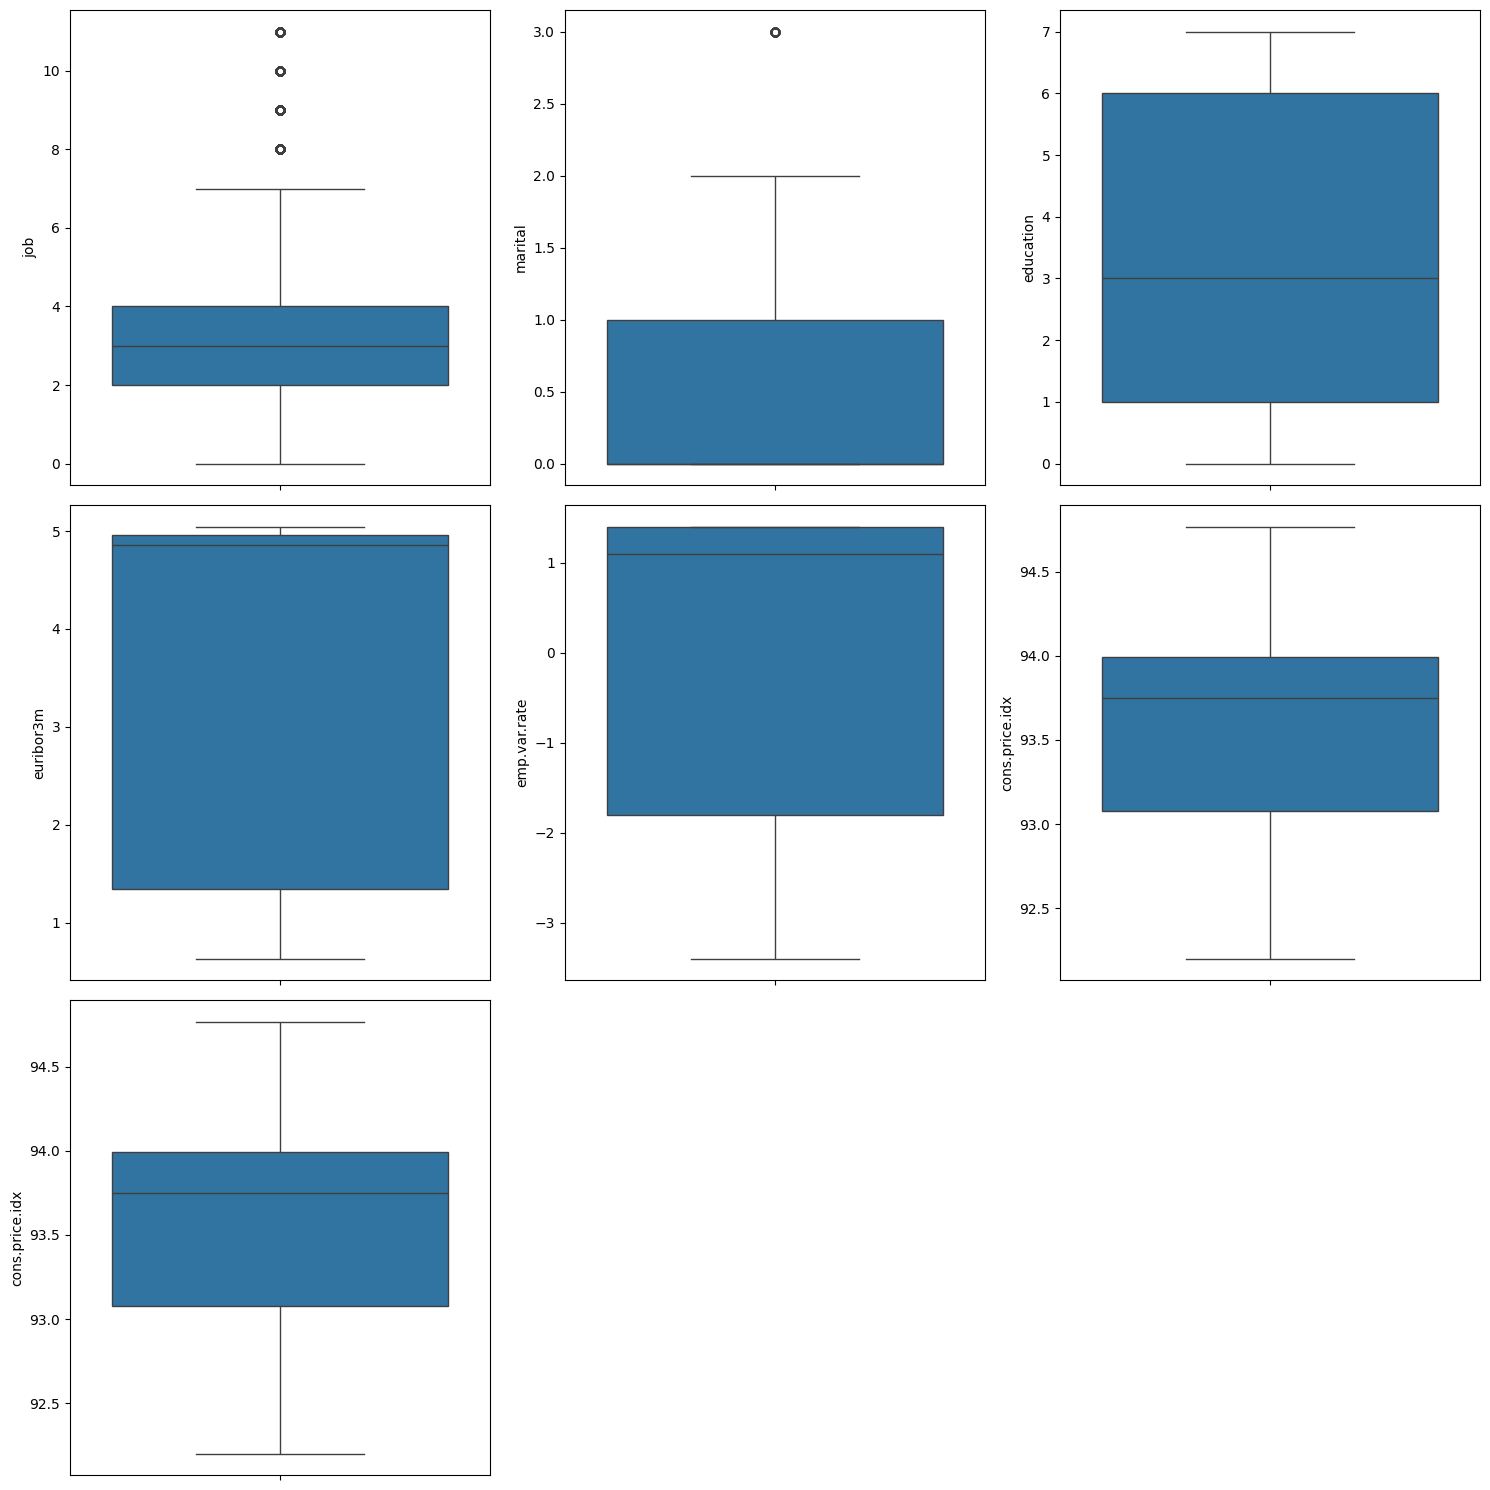

In [62]:
#outlaiers

fig, axis = plt.subplots(3, 3, figsize = (15, 15))

sns.boxplot(ax = axis[0, 0], data = total_data, y = "job")
sns.boxplot(ax = axis[0, 1], data = total_data, y = "marital")
sns.boxplot(ax = axis[0, 2], data = total_data, y = "education")
sns.boxplot(ax = axis[1, 0], data = total_data, y = "euribor3m")
sns.boxplot(ax = axis[1, 1], data = total_data, y = "emp.var.rate") 	
sns.boxplot(ax = axis[1, 2], data = total_data, y = "cons.price.idx")
sns.boxplot(ax = axis[2, 0], data = total_data, y = "cons.price.idx")
fig.delaxes(axis[2, 1])
fig.delaxes(axis[2, 2])


plt.tight_layout()

plt.show()

In [37]:
import pandas as pd
print(total_data.columns)
total_data.dtypes

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y'],
      dtype='object')


age                 int64
job                 int64
marital             int64
education           int64
default             int64
housing             int64
loan                int64
contact             int64
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome            int64
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int64
dtype: object

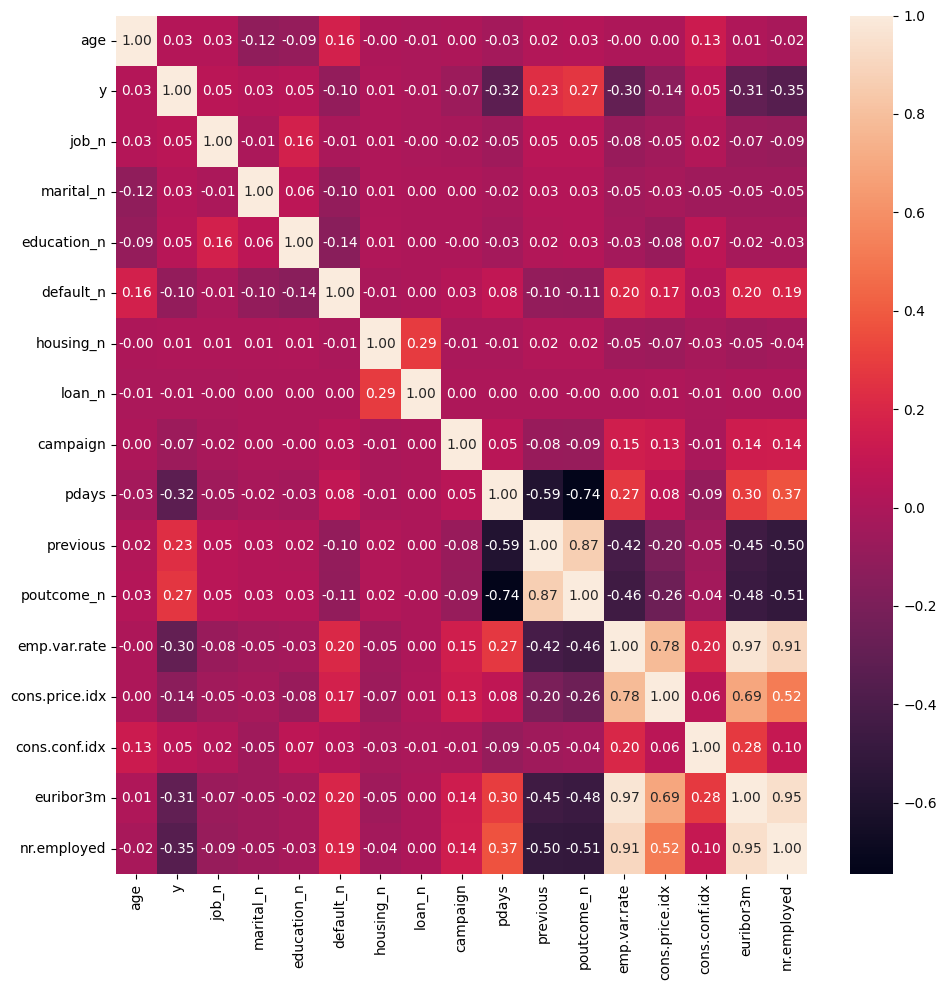

In [66]:
###Factorizar la variable
total_data["job_n"] = pd.factorize(total_data["job"])[0]
total_data["marital_n"] = pd.factorize(total_data["marital"])[0]
total_data["education_n"] = pd.factorize(total_data["education"])[0]
total_data["default_n"] = pd.factorize(total_data["default"])[0]
total_data["housing_n"] = pd.factorize(total_data["housing"])[0]
total_data["loan_n"] = pd.factorize(total_data["loan"])[0]
#total_data["month_n"] = pd.factorize(total_data["month"])[0]
#total_data["day_of_week_n"] = pd.factorize(total_data["day_of_week"])[0]
total_data["poutcome_n"] = pd.factorize(total_data["poutcome"])[0]
total_data["y_n"] = pd.factorize(total_data["y"])[0]


fig, axis = plt.subplots(figsize = (10, 10))

sns.heatmap(total_data[["age","y", "job_n", "marital_n", "education_n", "default_n", "housing_n", "loan_n", "campaign", "pdays", "previous","poutcome_n",	"emp.var.rate",	"cons.price.idx", "cons.conf.idx",	"euribor3m","nr.employed"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

In [67]:
#SEPARAR EL DATA SET Y ESCALAR
###Factorizar la variable
total_data["job"] = pd.factorize(total_data["job"])[0]
total_data["marital"] = pd.factorize(total_data["marital"])[0]
total_data["education"] = pd.factorize(total_data["education"])[0]
total_data["default"] = pd.factorize(total_data["default"])[0]
total_data["housing"] = pd.factorize(total_data["housing"])[0]
total_data["loan"] = pd.factorize(total_data["loan"])[0]
total_data["contact"] = pd.factorize(total_data["contact"])[0]
total_data["poutcome"] = pd.factorize(total_data["poutcome"])[0]
total_data["y"] = pd.factorize(total_data["y"])[0]


from sklearn.model_selection import train_test_split
num_variables = ["age", "job", "marital", "education", "default", "housing", "loan", "contact", "campaign", "pdays", "previous","poutcome",	"emp.var.rate",	"cons.price.idx", "cons.conf.idx",	"euribor3m","nr.employed"]


# We divide the dataset into training and test samples
X = total_data.drop("y", axis = 1)[num_variables]
y = total_data["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,age,job,marital,education,default,housing,loan,contact,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
12346,29,10,0,2,0,1,1,0,3,999,0,0,1.4,93.918,-42.7,4.959,5228.1
8564,50,2,1,6,0,0,0,0,6,999,0,0,1.4,94.465,-41.8,4.864,5228.1
21417,29,2,1,6,0,0,0,1,4,999,0,0,1.4,93.444,-36.1,4.963,5228.1
3315,35,2,1,6,0,0,0,0,1,999,0,0,1.1,93.994,-36.4,4.860,5191.0
33236,40,3,1,1,1,0,0,1,1,999,0,0,-1.8,92.893,-46.2,1.291,5099.1


In [70]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scal = scaler.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index = X_train.index, columns = num_variables)

X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index = X_test.index, columns = num_variables)

X_train_scal.head()

,age,job,marital,education,default,housing,loan,contact,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
12346,0.148148,0.909091,0.000000,0.285714,0.0,0.5,0.5,0.0,0.036364,1.0,0.0,0.0,1.000000,0.669135,0.338912,0.980503,1.000000
8564,0.407407,0.181818,0.333333,0.857143,0.0,0.0,0.0,0.0,0.090909,1.0,0.0,0.0,1.000000,0.882307,0.376569,0.958966,1.000000
21417,0.148148,0.181818,0.333333,0.857143,0.0,0.0,0.0,1.0,0.054545,1.0,0.0,0.0,1.000000,0.484412,0.615063,0.981410,1.000000
3315,0.222222,0.181818,0.333333,0.857143,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.937500,0.698753,0.602510,0.958059,0.859735
33236,0.283951,0.272727,0.333333,0.142857,0.5,0.0,0.0,1.0,0.000000,1.0,0.0,0.0,0.333333,0.269680,0.192469,0.148946,0.512287


In [71]:
from sklearn.feature_selection import f_classif, SelectKBest

# Con un valor de k = 5 queremos decir implícitamente que queremos eliminar 2 características del conjunto de datos
selection_model = SelectKBest(f_classif, k = 5)
selection_model.fit(X_train_scal, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,pdays,poutcome,emp.var.rate,euribor3m,nr.employed
0,999.0,0.0,1.4,4.959,5228.1
1,999.0,0.0,1.4,4.864,5228.1
2,999.0,0.0,1.4,4.963,5228.1
3,999.0,0.0,1.1,4.860,5191.0
4,999.0,0.0,-1.8,1.291,5099.1


In [ ]:
X_test_sel.head()

,pdays,poutcome,emp.var.rate,euribor3m,nr.employed
0,999.0,0.0,-2.9,1.266,5076.2
1,999.0,1.0,-1.8,1.299,5099.1
2,999.0,0.0,-1.1,0.959,4963.6
3,999.0,1.0,-1.8,1.299,5099.1
4,999.0,0.0,1.4,4.963,5228.1


In [72]:
X_train_sel["y"] = list(y_train)
X_test_sel["y"] = list(y_test)
X_train_sel.to_csv("../data/processed/clean_train.csv", index=False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index=False)

In [73]:
import pandas as pd

train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

X_train = train_data.drop(["y"], axis = 1)
y_train = train_data["y"]
X_test = test_data.drop(["y"], axis = 1)
y_test = test_data["y"]

train_data.head()



,pdays,poutcome,emp.var.rate,euribor3m,nr.employed,y
0,999.0,0.0,1.4,4.959,5228.1,0
1,999.0,0.0,1.4,4.864,5228.1,0
2,999.0,0.0,1.4,4.963,5228.1,0
3,999.0,0.0,1.1,4.860,5191.0,0
4,999.0,0.0,-1.8,1.291,5099.1,0


In [75]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [76]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [77]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.894487615347256

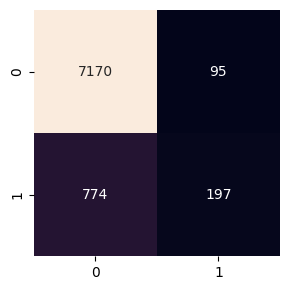

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

marketing_cm = confusion_matrix(y_test, y_pred)

# Dibujaremos esta matriz para hacerla más visual
cm_df = pd.DataFrame(marketing_cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

 Sumartoria de toda la matriz da un Total= 8236 clientes
 Con el 89% seria que 7330 clientes tienen mayor probabilidad de contratar un depósito a largo plazo
 

In [79]:

########### Búsqueda en malla

from sklearn.model_selection import GridSearchCV

# Definimos los parámetros a mano que queremos ajustar
hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

# Inicializamos la grid
grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 5)
grid


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [80]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train, y_train)

print(f"Mejores hiperparámetros: {grid.best_params_}")

/home/vscode/.local/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/vscode/.local/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/vscode/.local/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/vscode/.local/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/vscode/.local/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm

Mejores hiperparámetros: {'C': 0.001, 'penalty': 'l2', 'solver': 'newton-cg'}


In [ ]:
model_grid = LogisticRegression(penalty = "l2", C =0.1, solver = 'newton-cg')
model_grid.fit(X_train, y_train)
y_pred = model_grid.predict(X_test)

grid_accuracy = accuracy_score(y_test, y_pred)
grid_accuracy

/home/vscode/.local/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/vscode/.local/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


0.8933948518698397

In [81]:

########### búsqueda aleatoria (random search)
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

# Definimos los parámetros que queremos ajustar
hyperparams = {
    "C": np.logspace(-4, 4, 20),
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

# Inicializamos la búsqueda aleatoria
random_search = RandomizedSearchCV(model, hyperparams, n_iter = 100, scoring = "accuracy", cv = 5, random_state = 42)
random_search

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=100,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    None],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=42, scoring='accuracy')

In [83]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

random_search.fit(X_train, y_train)

print(f"Mejores hiperparámetros: {random_search.best_params_}")

/home/vscode/.local/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/vscode/.local/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/vscode/.local/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/vscode/.local/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/vscode/.local/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm

Mejores hiperparámetros: {'solver': 'newton-cg', 'penalty': 'l2', 'C': 0.00026366508987303583}


In [84]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

model_random_search = LogisticRegression(penalty = "l2", C = 0.00026366508987303583, solver = 'newton-cg')
model_random_search.fit(X_train, y_train)
y_pred = model_random_search.predict(X_test)

random_search_accuracy = accuracy_score(y_test, y_pred)
random_search_accuracy

/home/vscode/.local/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/vscode/.local/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


0.8946090335114133

Accuarancy_ modelo_default: 0.894487615347256
Accuarancy_con_malla:0.8933948518698397
Acciarancy_random: 0.8946090335114133